In [3]:
# Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
# 1. Data Loading and Initial Exploration
df = pd.read_csv("SKILICARSLAN_Anemia_DataSet.csv")

In [5]:
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GENDER               15300 non-null  int64  
 1   WBC                  15300 non-null  float64
 2   NE#                  15300 non-null  float64
 3   LY#                  15300 non-null  float64
 4   MO#                  15300 non-null  float64
 5   EO#                  15300 non-null  float64
 6   BA#                  15300 non-null  float64
 7   RBC                  15300 non-null  float64
 8   HGB                  15300 non-null  float64
 9   HCT                  15300 non-null  float64
 10  MCV                  15300 non-null  float64
 11  MCH                  15300 non-null  float64
 12  MCHC                 15300 non-null  float64
 13  RDW                  15300 non-null  float64
 14  PLT                  15300 non-null  float64
 15  MPV                  15300 non-null 

In [7]:
# 2. Data Cleaning and Preprocessing
print(df.isnull().sum())
# Handle missing values if any (this dataset appears complete)
# df = df.dropna()

GENDER                 0
WBC                    0
NE#                    0
LY#                    0
MO#                    0
EO#                    0
BA#                    0
RBC                    0
HGB                    0
HCT                    0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
PLT                    0
MPV                    0
PCT                    0
PDW                    0
SD                     0
SDTSD                  0
TSD                    0
FERRITTE               0
FOLATE                 0
B12                    0
All_Class              0
HGB_Anemia_Class       0
Iron_anemia_Class      0
Folate_anemia_class    0
B12_Anemia_class       0
dtype: int64


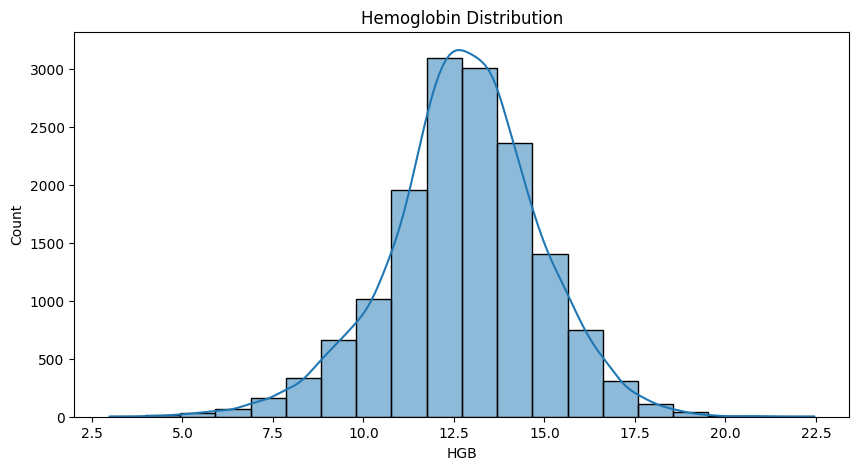

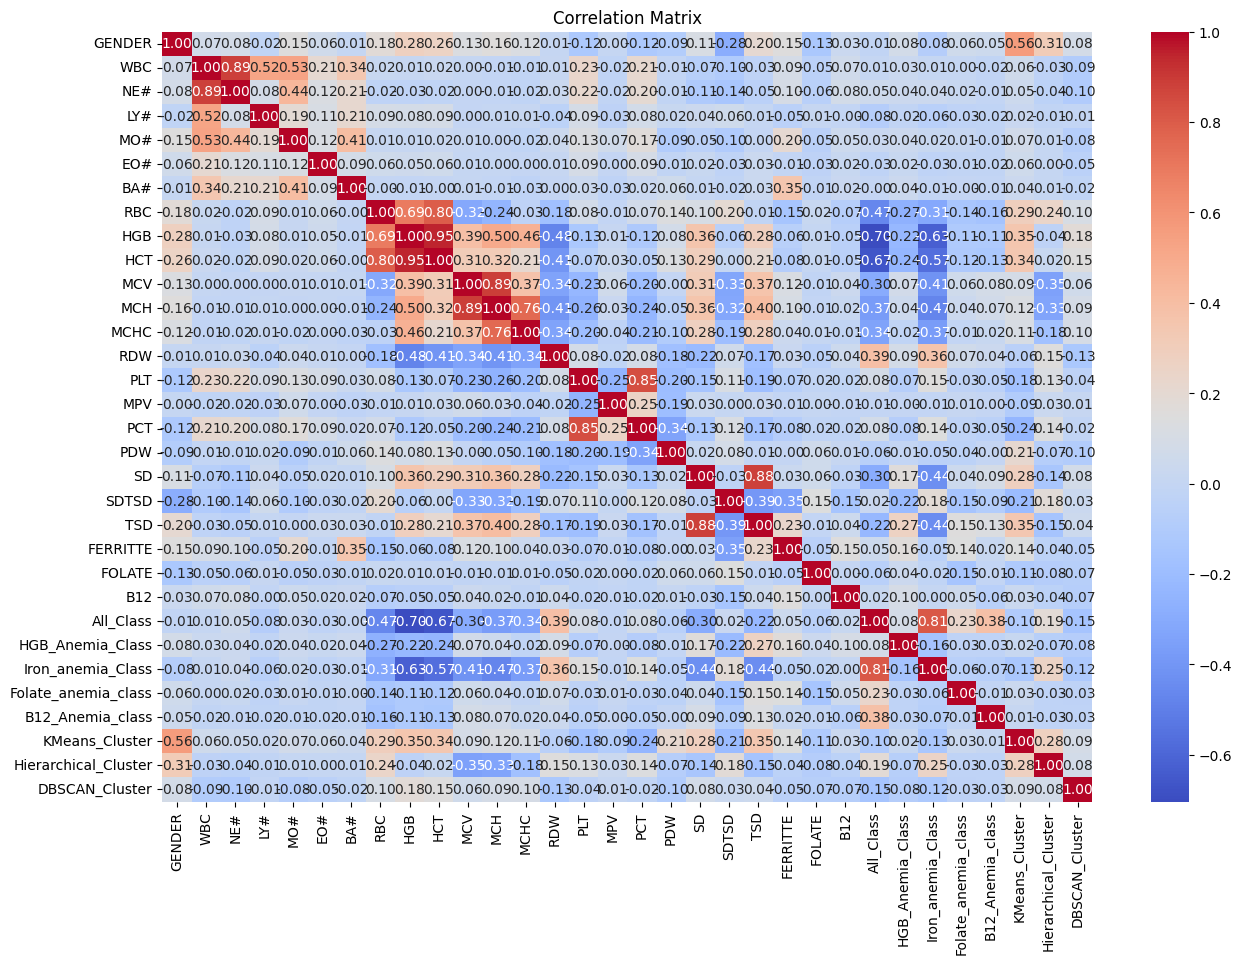

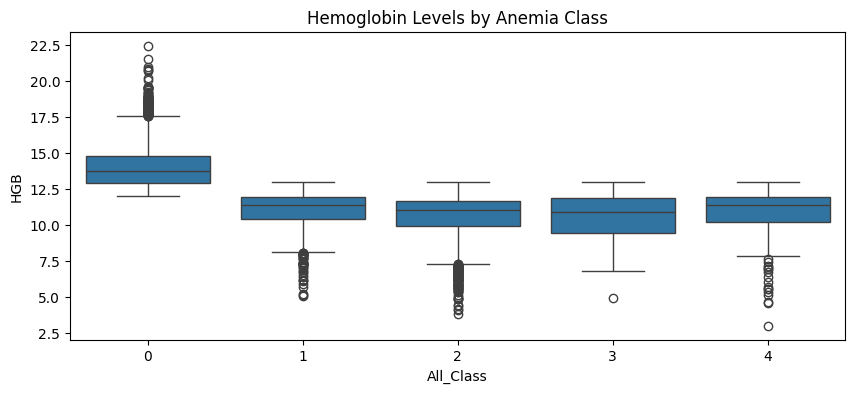

In [21]:
# 3. Exploratory Data Analysis (EDA)

# Plot distributions of key features
plt.figure(figsize=(10,5))
sns.histplot(df['HGB'], kde=True, bins=20)
plt.title('Hemoglobin Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for key markers by anemia class
plt.figure(figsize=(10,4))
sns.boxplot(x='All_Class', y='HGB', data=df)
plt.title('Hemoglobin Levels by Anemia Class')
plt.show()

In [9]:
# Separate features from target variables
features = df.drop(['All_Class', 'HGB_Anemia_Class', 'Iron_anemia_Class', 'Folate_anemia_class', 'B12_Anemia_class'], axis=1)
targets = df[['All_Class', 'HGB_Anemia_Class', 'Iron_anemia_Class', 'Folate_anemia_class', 'B12_Anemia_class']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

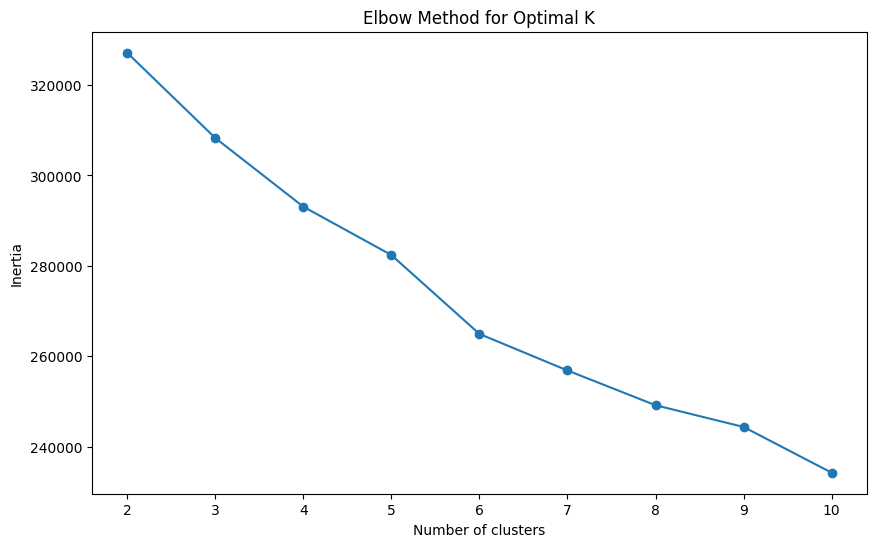

In [22]:
# Determine optimal number of clusters using elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


                  GENDER        WBC        NE#       LY#       MO#       EO#  \
KMeans_Cluster                                                                 
0               0.808473   7.998238   4.847548  2.312533  0.594117  0.180955   
1               0.048081   7.518854   4.532078  2.265559  0.518262  0.145354   
2               0.182638   7.632452   4.733532  2.145323  0.543982  0.147854   
3               0.530069   7.648995   5.281637  1.607841  0.570436  0.137857   
4               0.555723  17.666425  12.410696  3.745692  1.108537  0.212510   

                     BA#       RBC        HGB        HCT  ...    FERRITTE  \
KMeans_Cluster                                            ...               
0               0.063649  5.247948  15.202883  45.076443  ...  139.536043   
1               0.058027  4.639007  12.977412  39.330975  ...   50.643409   
2               0.061894  4.779602  10.579938  34.492262  ...   32.112751   
3               0.051257  3.783350  11.040171  33.3892

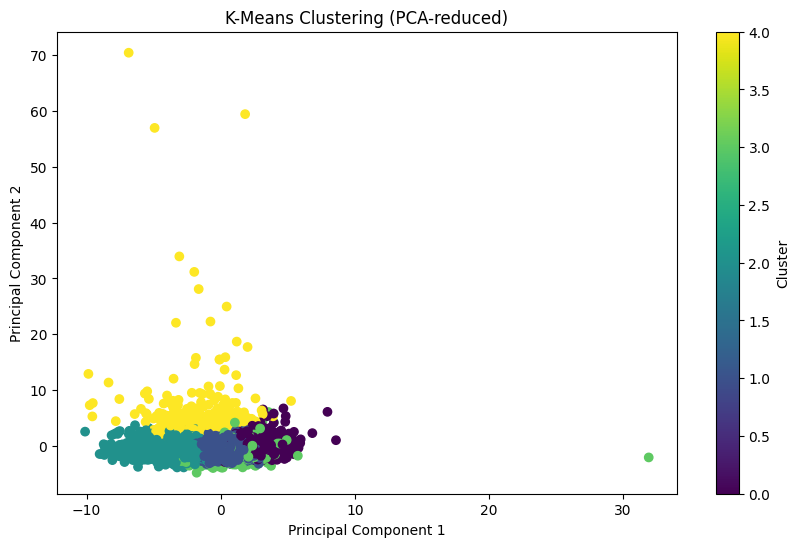

In [23]:
# Based on the elbow plot, We choose 5
kmeans = KMeans(n_clusters=5, random_state=15)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to the original data
df['KMeans_Cluster'] = clusters

# Analyze cluster characteristics
cluster_means = df.groupby('KMeans_Cluster').mean()
print(cluster_means)

# Visualize clusters with PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

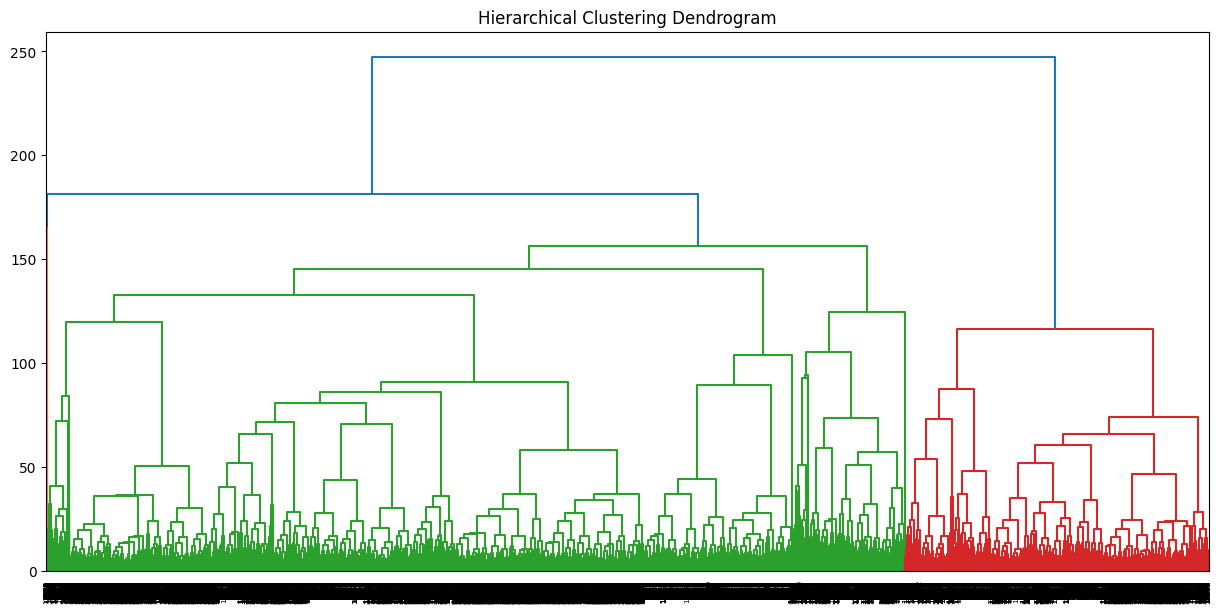

Hierarchical_Cluster     0    1   2  3     4     5
KMeans_Cluster                                    
0                     2092   73   0  0   393   328
1                     3818  318   0  0  1248     4
2                      195   54   0  0  2225     2
3                      454  929   1  0    51    54
4                        5    0  10  1     0     0
5                     1285  115   0  0    77  1568
                        GENDER        WBC        NE#        LY#        MO#  \
Hierarchical_Cluster                                                         
0                     0.195949   8.226924   5.134968   2.302263   0.571859   
1                     0.453996   7.818612   5.340548   1.709298   0.562184   
2                     0.545455  91.496364  35.587273  51.463636   1.457273   
3                     0.000000  51.170000  12.140000   0.390000  13.750000   
4                     0.190285   7.787424   4.844478   2.179974   0.549067   
5                     0.992331   7.963733   4.

In [12]:
# Perform hierarchical clustering
linked = linkage(scaled_features, 'ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut the dendrogram to get clusters
hierarchical = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(scaled_features)

df['Hierarchical_Cluster'] = hierarchical_clusters

# Compare with K-Means
print(pd.crosstab(df['KMeans_Cluster'], df['Hierarchical_Cluster']))

# Analyze hierarchical cluster characteristics
hierarchical_means = df.groupby('Hierarchical_Cluster').mean()
print(hierarchical_means)

DBSCAN found 17 clusters
                GENDER       WBC       NE#       LY#       MO#       EO#  \
DBSCAN_Cluster                                                             
0                  0.0  6.998179  4.067866  2.280021  0.470815  0.118512   
1                  0.0  6.907495  3.995210  2.234810  0.514770  0.122064   
2                  0.0  7.598000  4.242000  2.708000  0.422000  0.132000   
3                  0.0  7.624000  4.538000  2.382000  0.494000  0.130000   
4                  0.0  6.496000  3.720000  2.088000  0.494000  0.136000   
5                  0.0  8.840000  4.830000  3.155000  0.495000  0.295000   
6                  0.0  8.341250  5.075000  2.782500  0.368750  0.051250   
7                  1.0  6.828278  3.954167  2.158333  0.536444  0.136667   
8                  1.0  6.596852  3.819815  2.140185  0.464667  0.121833   
9                  1.0  6.720362  3.893768  2.105522  0.517000  0.140841   
10                 1.0  5.935000  3.305000  2.030000  0.452500 

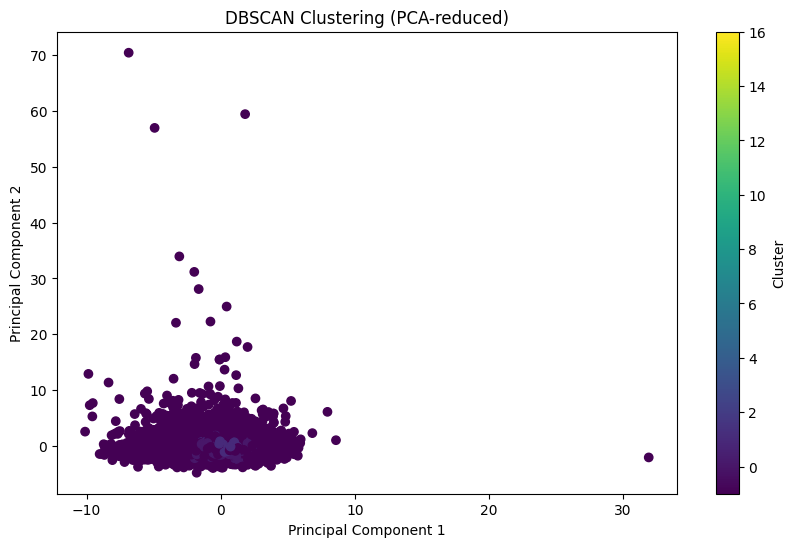

In [13]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_features)

df['DBSCAN_Cluster'] = dbscan_clusters

# Number of clusters (excluding noise)
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"DBSCAN found {n_clusters} clusters")

# Analyze DBSCAN results
dbscan_means = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print(dbscan_means)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [14]:
# Create a new DataFrame for binary features
binary_data = pd.DataFrame()

# Blood count abnormalities
binary_data['High_WBC'] = (df['WBC'] > 11).astype(int)  # Leukocytosis
binary_data['Low_WBC'] = (df['WBC'] < 4).astype(int)    # Leukopenia
binary_data['High_RBC'] = (df['RBC'] > 5.5).astype(int) # Polycythemia
binary_data['Low_RBC'] = (df['RBC'] < 4).astype(int)    # Anemia threshold
binary_data['High_HGB'] = (df['HGB'] > 16).astype(int)  # Polycythemia
binary_data['Low_HGB'] = (df['HGB'] < 12).astype(int)   # Anemia threshold
binary_data['High_HCT'] = (df['HCT'] > 48).astype(int)  # Polycythemia
binary_data['Low_HCT'] = (df['HCT'] < 36).astype(int)   # Anemia threshold

# Red blood cell indices
binary_data['High_MCV'] = (df['MCV'] > 100).astype(int) # Macrocytosis
binary_data['Low_MCV'] = (df['MCV'] < 80).astype(int)   # Microcytosis
binary_data['High_MCH'] = (df['MCH'] > 34).astype(int)  
binary_data['Low_MCH'] = (df['MCH'] < 27).astype(int)   
binary_data['High_MCHC'] = (df['MCHC'] > 36).astype(int)
binary_data['Low_MCHC'] = (df['MCHC'] < 32).astype(int)

# Platelet abnormalities
binary_data['High_PLT'] = (df['PLT'] > 450).astype(int) # Thrombocytosis
binary_data['Low_PLT'] = (df['PLT'] < 150).astype(int)  # Thrombocytopenia

# Specific nutrient deficiencies
binary_data['Low_Ferritin'] = (df['FERRITTE'] < 15).astype(int)  # Iron deficiency
binary_data['Low_Folate'] = (df['FOLATE'] < 3).astype(int)      # Folate deficiency
binary_data['Low_B12'] = (df['B12'] < 200).astype(int)          # B12 deficiency

# Anemia types (from the dataset)
binary_data['Anemia'] = (df['All_Class'] != 4).astype(int)           # Any anemia
binary_data['HGB_Anemia'] = df['HGB_Anemia_Class'].astype(int)       # Hemoglobin-related anemia
binary_data['Iron_Anemia'] = df['Iron_anemia_Class'].astype(int)     # Iron deficiency anemia
binary_data['Folate_Anemia'] = df['Folate_anemia_class'].astype(int) # Folate deficiency anemia
binary_data['B12_Anemia'] = df['B12_Anemia_class'].astype(int)       # B12 deficiency anemia



In [15]:
# Step 2: Generate frequent itemsets with Apriori
# We use min_support=0.1 (10% of transactions) as our threshold
frequent_itemsets = apriori(binary_data, 
                           min_support=0.1, 
                           use_colnames=True,
                           max_len=4)  # Limit to 4 items max per itemset

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

Frequent Itemsets:
     support               itemsets
9   0.986993               (Anemia)
5   0.356732              (Low_MCH)
35  0.353922      (Low_MCH, Anemia)
2   0.319542              (Low_HGB)
20  0.309346      (Anemia, Low_HGB)
6   0.287712             (Low_MCHC)
38  0.284706     (Low_MCHC, Anemia)
43  0.273333  (Iron_Anemia, Anemia)
10  0.273333          (Iron_Anemia)
3   0.266340              (Low_HCT)


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, 
                         metric="lift", 
                         min_threshold=1.2)  # We want rules with lift > 1.2
# Step 4: Filter and sort the most interesting rules
# We'll look for high confidence (>70%) and high lift (>1.5) rules
interesting_rules = rules[
    (rules['lift'] > 1.5) & 
    (rules['confidence'] > 0.7) &
    (rules['consequents'].apply(lambda x: any(item in x for item in ['Anemia', 'HGB_Anemia', 
                                                                   'Iron_Anemia', 'Folate_Anemia', 
                                                                   'B12_Anemia'])))
]

# Sort by lift and confidence
interesting_rules = interesting_rules.sort_values(['lift', 'confidence'], ascending=False)

# Format the output for better readability
interesting_rules['antecedents'] = interesting_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
interesting_rules['consequents'] = interesting_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the most interesting rules
print("\nMost Interesting Association Rules:")
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))


Most Interesting Association Rules:
                        antecedents           consequents   support  \
631                Low_MCH, Low_HCT  Low_MCV, Iron_Anemia  0.107647   
475                Low_MCV, Low_HGB  Iron_Anemia, Low_MCH  0.137190   
628                Low_MCV, Low_HCT  Iron_Anemia, Low_MCH  0.107647   
567           Low_Ferritin, Low_HGB  Iron_Anemia, Low_MCH  0.116078   
541               Low_MCHC, Low_HGB  Iron_Anemia, Low_MCH  0.132026   
425           Low_Ferritin, Low_HGB  Iron_Anemia, Low_HCT  0.103595   
426           Low_HCT, Low_Ferritin  Iron_Anemia, Low_HGB  0.103595   
713               Low_MCV, Low_MCHC  Iron_Anemia, Low_MCH  0.107712   
331                Low_MCV, Low_HGB  Iron_Anemia, Low_HCT  0.108562   
154           Low_Ferritin, Low_HGB           Iron_Anemia  0.136797   
421  Low_HCT, Low_Ferritin, Low_HGB           Iron_Anemia  0.103595   
563  Low_MCH, Low_Ferritin, Low_HGB           Iron_Anemia  0.116078   
600   Low_Ferritin, Anemia, Low_HGB     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9088\840901722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')


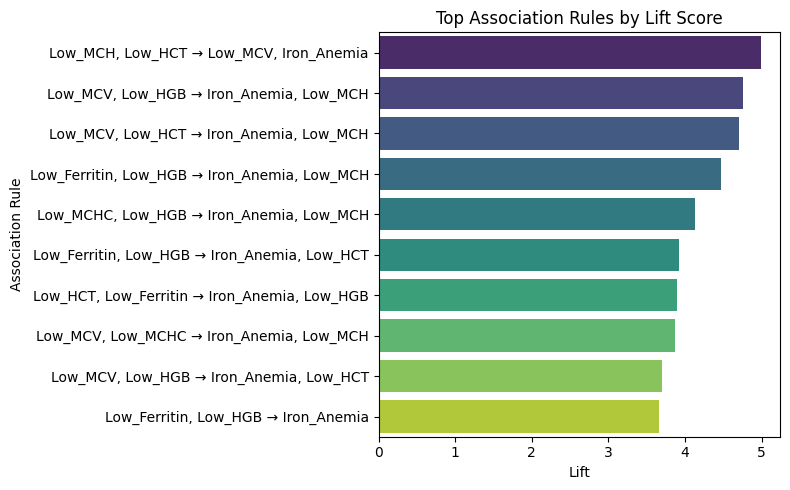

In [24]:
top_rules = interesting_rules.head(10).copy()
top_rules['rule'] = top_rules['antecedents'] + " → " + top_rules['consequents']

plt.figure(figsize=(8, 5))
sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')
plt.title('Top Association Rules by Lift Score')
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.tight_layout()
plt.show()